# Business Understanding

Preparing meals is often a challenge due to individual preferences, dietary needs, and ingredient availability. This project aims to develop a Personalized Recipe Recommendation System that uses machine learning and NLP to suggest relevant recipes tailored to each user. The system is designed to enhance convenience, promote healthier eating habits, and reduce food waste. It has potential applications in health tech, food delivery platforms, and smart kitchen systems.


# Problem Statement
To develop a Personalized Recipe Recommendation System that leverages machine learning and NLP

#Objectives

1.   To develop a content-based model using NLP to recommend recipes based on ingredients and instructions.
2.   To build a collaborative filtering model using user ratings and interactions.
3.   To combine both approaches into a hybrid recommendation system.
4.   To evaluate model performance

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install isodate


In [3]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from isodate import parse_duration
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path = "recipes.parquet"

df_recipes = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "irkaal/foodcom-recipes-and-reviews",
    file_path,
)


In [5]:
file_path2 = "reviews.parquet"

df_reviews = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "irkaal/foodcom-recipes-and-reviews",
    file_path2,
)


# Data Understanding


In [6]:
print("Recipes:", df_recipes.shape)
print("Reviews:", df_reviews.shape)

Recipes: (522517, 28)
Reviews: (1401982, 8)


In [7]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[us, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


In [9]:
df_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [10]:
df_reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [11]:
df_recipes.isnull().sum()

,0
RecipeId,0
Name,0
AuthorId,0
AuthorName,0
CookTime,82545
PrepTime,0
TotalTime,0
DatePublished,0
Description,5
Images,1


In [12]:
df_reviews.isnull().sum()

,0
ReviewId,0
RecipeId,0
AuthorId,0
AuthorName,0
Rating,0
Review,0
DateSubmitted,0
DateModified,0


# Data Cleaning

In [13]:
#Handling Missing Values
df_recipes['AggregatedRating'] = df_recipes['AggregatedRating'].fillna(0)
df_recipes['ReviewCount'] = df_recipes['ReviewCount'].fillna(0)
df_recipes['RecipeServings'] = df_recipes['RecipeServings'].fillna(df_recipes['RecipeServings'].median())
df_recipes['RecipeCategory'] = df_recipes['RecipeCategory'].fillna("Unknown").str.lower().str.strip()

df_reviews.dropna(subset=['Review'], inplace=True)

In [14]:
# Converting the time to minutes
def safe_parse_minutes(x):
    if pd.isnull(x) or not isinstance(x, str) or not x.startswith('P'):
        return 0
    try:
        return parse_duration(x).total_seconds() / 60
    except:
        return 0

df_recipes['CookTimeMinutes'] = df_recipes['CookTime'].apply(safe_parse_minutes)
df_recipes['PrepTimeMinutes'] = df_recipes['PrepTime'].apply(safe_parse_minutes)
df_recipes['TotalTimeMinutes'] = df_recipes['TotalTime'].apply(safe_parse_minutes)

In [15]:
# Filling missing time with 0
df_recipes[['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']] = df_recipes[
    ['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']
].fillna(0)

In [16]:
# Drop rows where total time is less than 0
df_recipes = df_recipes[df_recipes['TotalTimeMinutes'] > 0]


In [17]:
# Convert numpy arrays to regular lists
df_recipes['Ingredients'] = df_recipes['RecipeIngredientParts'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df_recipes['Quantities'] = df_recipes['RecipeIngredientQuantities'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

In [18]:
#Convert Text to Lowercase & Clean
for text_col in ['Name', 'Description', 'RecipeInstructions','Keywords']:
    df_recipes[text_col] = df_recipes[text_col].astype(str).str.lower().str.replace(r'[^a-z\s]', '', regex=True)


In [19]:
#Tokenize Keywords into List Format
df_recipes['KeywordList'] = df_recipes['Keywords'].apply(lambda x: x.split())

In [20]:
df_reviews['Rating'] = df_reviews['Rating'].astype(float)

In [21]:
# Drop duplicate recipes and reviews
df_recipes.drop_duplicates(subset=['RecipeId'], inplace=True)
df_reviews.drop_duplicates(subset=['ReviewId'], inplace=True)


In [22]:
#Drop Recipes with Few reviews
MIN_REVIEWS = 5
popular_recipes = df_reviews['RecipeId'].value_counts()
popular_recipes = popular_recipes[popular_recipes >= MIN_REVIEWS].index
df_recipes = df_recipes[df_recipes['RecipeId'].isin(popular_recipes)]
df_reviews = df_reviews[df_reviews['RecipeId'].isin(popular_recipes)]


In [23]:
# Drop unnecesary cols
drop_cols = ['AuthorName', 'TotalTime', 'PrepTime','CookTime','RecipeIngredientParts','RecipeIngredientQuantities','RecipeYield','Keywords']
df_recipes.drop(columns=drop_cols, inplace=True, errors='ignore')

drop_cols2 = ['AuthorName']
df_reviews.drop(columns=drop_cols2, inplace=True, errors='ignore')

In [24]:
recipes_clean=df_recipes
reviews_clean=df_reviews

In [25]:
missing_recipe_ids = reviews_clean[~reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])]
print(f"Number of reviews with RecipeId not in recipes: {len(missing_recipe_ids)}")


Number of reviews with RecipeId not in recipes: 4079


In [26]:
missing_author_ids = reviews_clean[~reviews_clean['AuthorId'].isin(recipes_clean['AuthorId'])]
print(f"Number of reviews with AuthorId not in recipes: {len(missing_author_ids)}")


Number of reviews with AuthorId not in recipes: 532306


In [27]:
# Create a set of valid (RecipeId, AuthorId) pairs from the recipes dataset
valid_pairs = set(zip(recipes_clean['RecipeId'], recipes_clean['AuthorId']))

# Check which rows in reviews don't have a matching pair
invalid_pairs = reviews_clean[~reviews_clean.apply(lambda row: (row['RecipeId'], row['AuthorId']) in valid_pairs, axis=1)]

print(f"Number of reviews with unmatched RecipeId & AuthorId pairs: {len(invalid_pairs)}")


Number of reviews with unmatched RecipeId & AuthorId pairs: 1028061


In [28]:
# Keep only reviews with RecipeIds that exist in recipes
valid_reviews = reviews_clean[reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])].copy()

print(f"Remaining reviews after filtering: {len(valid_reviews)}")


Remaining reviews after filtering: 1024428


In [29]:
# Merge on RecipeId
merged_df = pd.merge(
    valid_reviews,
    recipes_clean,
    on='RecipeId',
    how='inner',
    suffixes=('_review', '_recipe')
)

print(f"Merged dataset shape: {merged_df.shape}")
print(merged_df[['RecipeId', 'AuthorId_review', 'AuthorId_recipe']].head())


Merged dataset shape: (1024428, 32)
   RecipeId  AuthorId_review  AuthorId_recipe
0       992             2008             1545
1      4523             2046             1932
2      7435             1773             1986
3        44             2085             1596
4     13307             2046            20914


In [30]:
# drop AuthorId_review - we are more interested in the authors of the recipes
drop_cols3 = ['AuthorId_review']
merged_df.drop(columns=drop_cols3, inplace=True, errors='ignore')

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024428 entries, 0 to 1024427
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   ReviewId             1024428 non-null  int32              
 1   RecipeId             1024428 non-null  int32              
 2   Rating               1024428 non-null  float64            
 3   Review               1024428 non-null  object             
 4   DateSubmitted        1024428 non-null  datetime64[us, UTC]
 5   DateModified         1024428 non-null  datetime64[us, UTC]
 6   Name                 1024428 non-null  object             
 7   AuthorId_recipe      1024428 non-null  int32              
 8   DatePublished        1024428 non-null  datetime64[us, UTC]
 9   Description          1024428 non-null  object             
 10  Images               1024428 non-null  object             
 11  RecipeCategory       1024428 non-null  object     

In [32]:
from sklearn.preprocessing import LabelEncoder

recipe_encoder = LabelEncoder()
author_encoder = LabelEncoder()

merged_df['RecipeId_encoded'] = recipe_encoder.fit_transform(merged_df['RecipeId'])


In [33]:
#Normalize Nutritional Features
from sklearn.preprocessing import MinMaxScaler

nutritional_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

scaler = MinMaxScaler()
merged_df[nutritional_cols] = scaler.fit_transform(merged_df[nutritional_cols])


##Feature Engineering
We are going to categorize recipes that share a theme into recipe categories

In [34]:
#print unique name and unique RecipeCategory

unique_categories = merged_df['RecipeCategory'].unique()

print("\nUnique Recipe Categories:")
print(unique_categories)





Unique Recipe Categories:
['vegetable' 'chicken breast' 'meat' 'chicken' 'dessert' 'lamb/sheep'
 'steak' 'pork' 'pie' 'tuna' 'sauces' 'quick breads' 'drop cookies'
 'lunch/snacks' 'winter' 'breads' 'whole chicken' 'bar cookie'
 'high protein' 'candy' 'beans' 'cheesecake' 'meatloaf' 'corn' 'stew'
 'potato' 'german' 'breakfast' 'white rice' '< 60 mins' 'cheese' 'crab'
 'punch beverage' 'cauliflower' 'european' 'ham' 'onions' 'clear soup'
 'beverages' 'lentil' 'low protein' 'savory pies' 'chowders' 'pineapple'
 'free of...' 'yeast breads' '< 15 mins' 'spaghetti' 'poultry' 'spreads'
 'gelatin' 'berries' 'one dish meal' 'fruit' 'mussels' 'frozen desserts'
 'roast beef' 'smoothies' 'long grain rice' 'salad dressings' 'oven'
 'weeknight' 'rice' 'manicotti' 'shakes' 'low cholesterol' 'scones'
 'halibut' 'greens' 'veal' 'potluck' 'vegan' 'very low carbs' 'plums'
 'tex mex' 'collard greens' 'brown rice' 'cajun' 'black beans' 'jellies'
 '< 30 mins' 'mahi mahi' 'penne' 'apple' 'lactose free'
 'so

In [35]:
# Define the category mapping (as shown above)
category_mapping = {
    'chicken': ['chicken', 'chicken breast', 'chicken thigh & leg', 'whole chicken', 'chicken livers'],
    'beef': ['steak', 'roast beef', 'beef organ meats', 'wild game', 'goose', 'meatballs', 'elk', 'moose', 'bear'],
    'pork': ['pork', 'ham', 'sausage', 'bacon'],
    'lamb': ['lamb/sheep'],
    'fish': ['tuna', 'halibut', 'tilapia', 'trout', 'bass', 'perch', 'salmon', 'catfish', 'mussels', 'squid', 'octopus', 'crab', 'lobster', 'shrimp', 'seafood'],
    'vegetarian': ['vegetable', 'vegan', 'tofu', 'lentil', 'beans', 'cauliflower', 'greens', 'spinach', 'broccoli', 'eggplant', 'zucchini', 'tomato', 'carrot', 'cucumber'],
    'desserts': ['dessert', 'candy', 'cheesecake', 'gelatin', 'frozen desserts', 'scones', 'cookies', 'chocolate', 'pie', 'cake', 'tarts', 'brownies', 'puddings'],
    'baked goods': ['bread', 'breads', 'quick breads', 'yeast breads', 'sourdough breads', 'rolls', 'buns', 'muffins', 'baking', 'pancakes'],
    'pasta': ['spaghetti', 'macaroni and cheese', 'penne', 'manicotti', 'pasta shells', 'lasagna'],
    'rice': ['white rice', 'brown rice', 'short grain rice', 'long grain rice', 'wild rice', 'rice', 'paella'],
    'potatoes': ['potato', 'mashed potatoes', 'sweet potato', 'yam/sweet potato'],
    'salads': ['salad', 'salad dressings', 'coleslaw', 'potato salad', 'fruit salad', 'pasta salad'],
    'soups': ['soup', 'clear soup', 'chowders', 'gumbo', 'stew', 'lentil soup', 'chicken soup'],
    'grains': ['grains', 'quinoa', 'oats', 'barley', 'couscous', 'farro', 'bulgur', 'rice'],
    'meatloaf': ['meatloaf'],
    'sauces': ['sauces', 'gravy', 'chutneys', 'barbecue sauce', 'pasta sauce'],
    'sides': ['corn', 'side dish', 'potluck', 'side salad'],
    'drinks': ['beverages', 'smoothies', 'punch beverage', 'shakes', 'milkshakes', 'smoothie bowls', 'coffee', 'tea'],
    'breakfast': ['breakfast', 'brunch', 'oatmeal', 'pancakes', 'eggs', 'waffles', 'crepes', 'granola', 'bagels'],
    'high protein': ['high protein', 'protein shakes', 'protein bars'],
    'low protein': ['low protein'],
    'healthy': ['healthy', 'low fat', 'low carb', 'low sugar', 'low cholesterol', 'heart healthy'],
    'low carb': ['very low carbs', 'low carb'],
    'low cholesterol': ['low cholesterol'],
    'high fiber': ['high fiber'],
    'gluten free': ['gluten free'],
    'dairy free': ['dairy free foods', 'lactose free'],
    'sugar free': ['sugar free', 'low sugar'],
    'holiday': ['thanksgiving', 'christmas', "st. patrick's day", 'halloween', 'easter'],
    'international': ['mexican', 'italian', 'chinese', 'indian', 'japanese', 'greek', 'thai', 'spanish', 'french', 'portuguese', 'moroccan', 'swedish', 'turkish', 'african', 'cuban', 'polynesian', 'caribbean', 'brazilian', 'german', 'lebanese', 'chilean', 'nepalese', 'ethiopian', 'venezuelan', 'neapolitan', 'cantonese', 'pakistani', 'vietnamese', 'southwestern u.s.', 'korean', 'south african', 'australian', 'chinese', 'palestinian', 'belgian', 'russian', 'hungarian', 'swiss', 'finnish', 'norwegian', 'danish'],
    'mexican': ['mexican', 'tex mex', 'southwestern u.s.'],
    'italian': ['italian', 'sicilian', 'neapolitan'],
    'asian': ['asian', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai'],
    'american': ['american', 'southern', 'new england', 'midwestern', 'californian'],
    'bbq': ['bbq', 'barbecue', 'grilled', 'broil/grill'],
    'cajun': ['cajun', 'creole', 'gumbo'],
    'seafood': ['fish', 'seafood', 'shrimp', 'lobster', 'mussels'],
    'vegan': ['vegan'],
    'low fat': ['low fat'],
    'poultry': ['poultry', 'duck', 'turkey', 'chicken', 'whole turkey', 'duck breasts', 'turkey breasts'],
    'holiday': ['christmas', 'thanksgiving', 'halloween', "st. patrick's day"],
    'fruit': ['fruit', 'berries', 'apples', 'bananas', 'pears', 'pineapple', 'grapes', 'mango', 'peaches', 'strawberries', 'raspberries', 'plums', 'oranges', 'lemons', 'cherries', 'citrus'],
    'potluck': ['potluck', 'party', 'for large groups'],
    'sweets': ['sweets', 'candies', 'chocolates', 'cookies', 'brownies', 'cakes'],
    'comfort food': ['comfort food', 'mac and cheese', 'meatloaf', 'mashed potatoes'],
    'quick meals': ['quick meals', 'quick', '< 30 mins', '< 15 mins', '< 60 mins'],
    'free of allergens': ['free of...', 'egg free', 'dairy free', 'gluten free', 'lactose free', 'peanut free'],
    'canned': ['canning', 'preserving'],
    'meals in a dish': ['one dish meal'],
    'low calorie': ['low calorie', 'low fat', 'low carb'],
    'sweets and snacks': ['sweets', 'candies', 'cookies', 'chips', 'snacks'],
    'easy': ['easy', 'beginner cook', 'beginner'],
    'other': ['unknown', 'bath/beauty', 'household cleaner', 'microwave', 'mixer', 'pressure cooker', 'slow cooker', 'stove top', 'camping', 'bread machine', 'small appliance', 'holiday'],
}

# Flatten the category mapping into a lookup dictionary
lookup = {kw.lower(): group for group, keywords in category_mapping.items() for kw in keywords}

# Function to map a single category to a broader group
def map_category(category):
    if pd.isna(category):
        return 'others'  # Handling missing values
    category = category.lower()  # Convert category to lowercase
    for keyword, group in lookup.items():
        if keyword in category:  # Check if keyword is part of category
            return group  # Return the corresponding group if found
    return 'others'  # Default category if no match found

# Apply the map_category function to the RecipeCategory column and add it as a new column
merged_df['MappedCategory'] = merged_df['RecipeCategory'].apply(map_category)

# Preview the new column to make sure it's working
#print(merged_df[['RecipeCategory', 'MappedCategory']].head())
merged_df.head()


,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,RecipeServings,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes,Ingredients,Quantities,KeywordList,RecipeId_encoded,MappedCategory
0,2,992,5.0,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00,jalapeno pepper poppers,1545,1999-09-06 04:28:00+00:00,make and share this jalapeno pepper poppers re...,...,24.0,in a mixing bowl combine cheeses bacon and sea...,0.0,30.0,30.0,"[cream cheese, sharp cheddar cheese, monterey ...","[8, 4, 4, 6, 1⁄4, 1⁄4, 1⁄4, 1, 1⁄2, None]","[mins, for, large, groups]",203,vegetarian
1,9,4523,2.0,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00,chinese imperial palace general tsos chicken,1932,1999-11-15 05:00:00+00:00,make and share this chinese imperial palace ge...,...,8.0,combine all ingredients for sauce in a quart j...,30.0,30.0,60.0,"[cornstarch, water, fresh garlic, fresh ginger...","[1⁄2, 1⁄4, 1 1⁄2, 1 1⁄2, 3⁄4, 1⁄2, 1⁄4, 1⁄4, 1...","[chicken, poultry, meat, chinese, asian, healt...",598,poultry
2,13,7435,5.0,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00,kevins best corned beef,1986,2000-03-11 15:27:00+00:00,make and share this kevins best corned beef re...,...,12.0,use a to qt pan\n coarsely chop enough onion...,200.0,75.0,275.0,"[onions, carrots, corned beef brisket, malt vi...","[1 3⁄4, 2 1⁄2, 6, 1, 6, 1, 1, 1⁄2, 1⁄2, 1⁄2, 2...","[european, winter, weeknight, st, patricks, day]",876,others
3,14,44,5.0,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00,warm chicken a la king,1596,1999-09-17 04:47:00+00:00,i copied this one out of a friends book so man...,...,2.0,melt ozs butter add the flour and cook for ...,3.0,35.0,38.0,"[chicken, butter, flour, milk, celery, button ...","[12, 2, 3, 450, 1, 2, 1⁄4, 1, None, None, 2, 2...","[poultry, meat, mins]",2,poultry
4,19,13307,5.0,"chewy goodness, not crispy at all. i even thre...",2000-05-21 16:59:00+00:00,2000-05-21 16:59:00+00:00,neimanmarcus chocolate chip cookies recipe,20914,2001-10-27 13:54:00+00:00,make and share this neimanmarcus chocolate ch...,...,6.0,measure oatmeal and blend in a blender to a fi...,6.0,30.0,36.0,"[butter, flour, baking soda, sugar, blended oa...","[2, 4, 2, 2, 5, 24, 2, 1, 1, 4, 2, 2, 3]","[lunchsnacks, cookie, brownie, kid, friendly, ...",2620,desserts


#EDA
We will do visualizations across themes to get understanding of how the data looks.

##Visualizations for User Review Analysis
We create a histogram showing the total count of reviews under each rating. i.e. How many people rated a recipe 1-5.

The visualization indicates that most recipes were rated a solid 5 which gives confidence in the quality of the recipes.

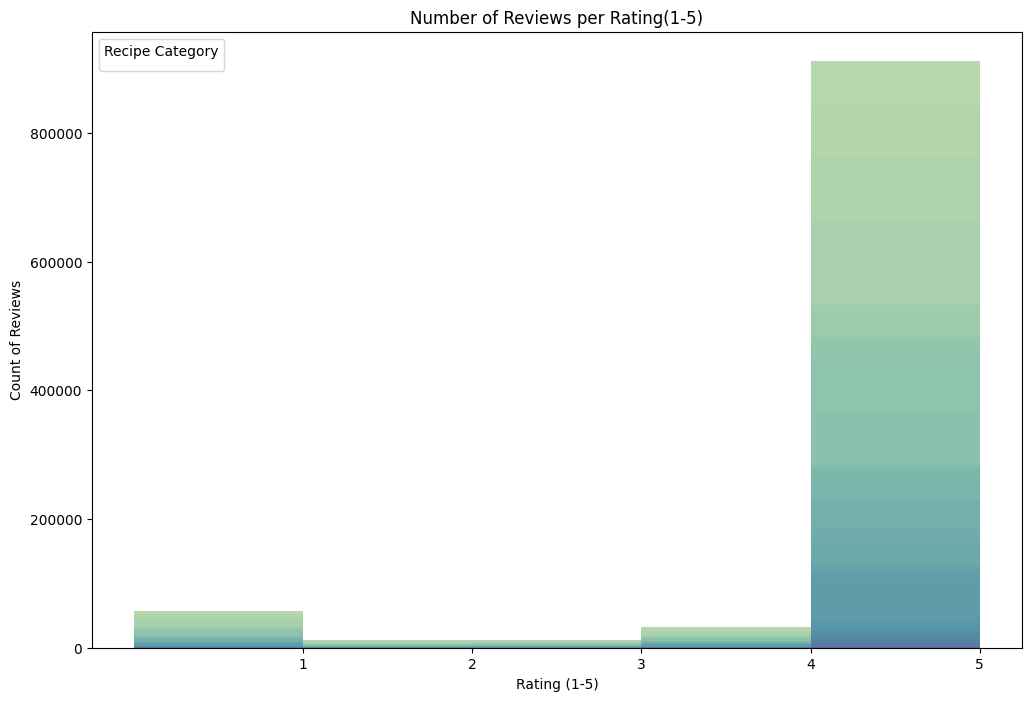

In [36]:
# Histogram of Rating Group by RecipeCategory
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='Rating', hue='MappedCategory', multiple="stack",bins=5, palette='crest', element='bars',edgecolor=None)
plt.title('Number of Reviews per Rating(1-5)')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.legend(title='Recipe Category')
plt.show()

2.We create a Line Plot to check how rating was done over the years.


The results indicate that recipes were highest rated by users in the year 2006. and least rated in the year 2017





In [37]:
#Check unique years under DateSubmitted column
unique_years = merged_df['DateSubmitted'].dt.year.unique()
print(unique_years)

[2000 2001 2002 2005 2003 2006 2004 2007 2020 2016 2018 2017 2008 2019
 2009 2010 2011 2012 2013 2014 2015]


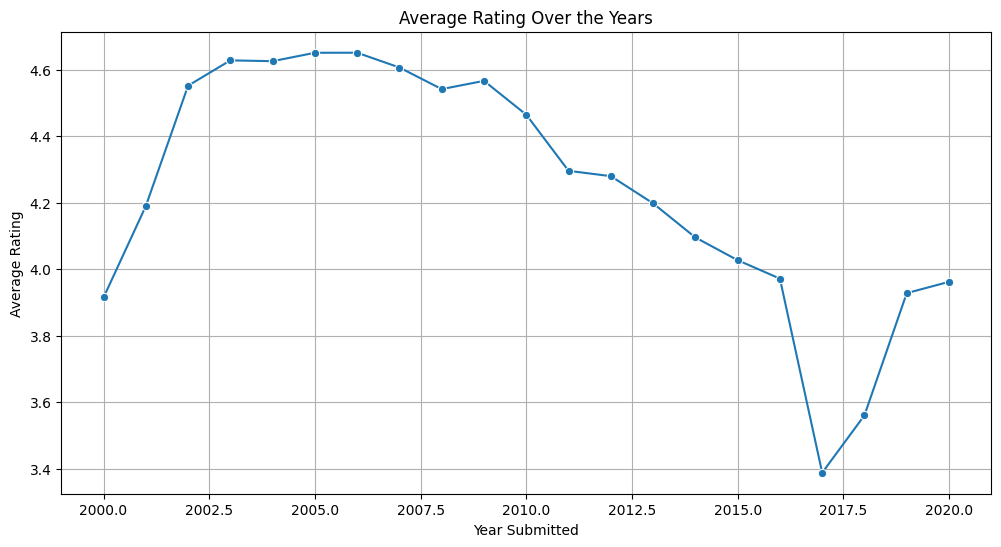

In [38]:
# Ensure 'DateSubmitted' is in datetime format
merged_df['DateSubmitted'] = pd.to_datetime(merged_df['DateSubmitted'])

# Extract the year
merged_df['SubmissionYear'] = merged_df['DateSubmitted'].dt.year

# Calculate the average rating per year
average_rating_by_year = merged_df.groupby('SubmissionYear')['Rating'].mean().reset_index()

# Sort by year
average_rating_by_year = average_rating_by_year.sort_values(by='SubmissionYear')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x='SubmissionYear', y='Rating', palette='crest',marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We do a Line Plot to checktotal count of reviews each year.

Results indicate that highest count of reviews was done in the year 2008 and least number of reviews was done in the year 2019



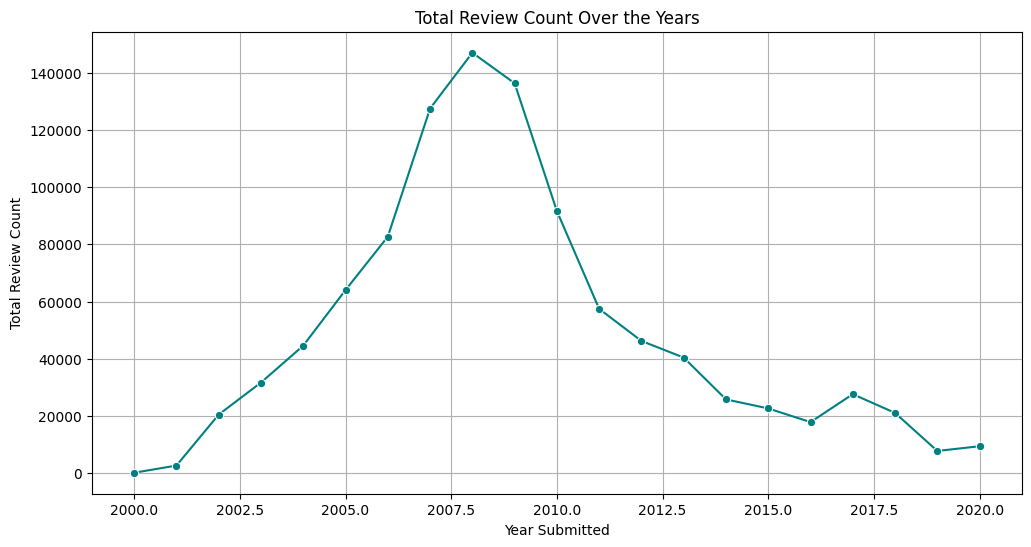

In [39]:
#visualization for reviewcount vs unique year

import matplotlib.pyplot as plt
# Aggregate review counts by year
review_count_by_year = merged_df.groupby('SubmissionYear').size().reset_index(name='ReviewCount')

# Sort by year
review_count_by_year = review_count_by_year.sort_values(by='SubmissionYear')

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=review_count_by_year, x='SubmissionYear', y='ReviewCount', color='teal',marker='o')
plt.title('Total Review Count Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Total Review Count')
plt.grid(True)
plt.show()

## Visualizations for Recipe Popularity


1. First Plot indicates the top 20 most and least reviewed recipes. This would mean they are the most and least popular recipes.

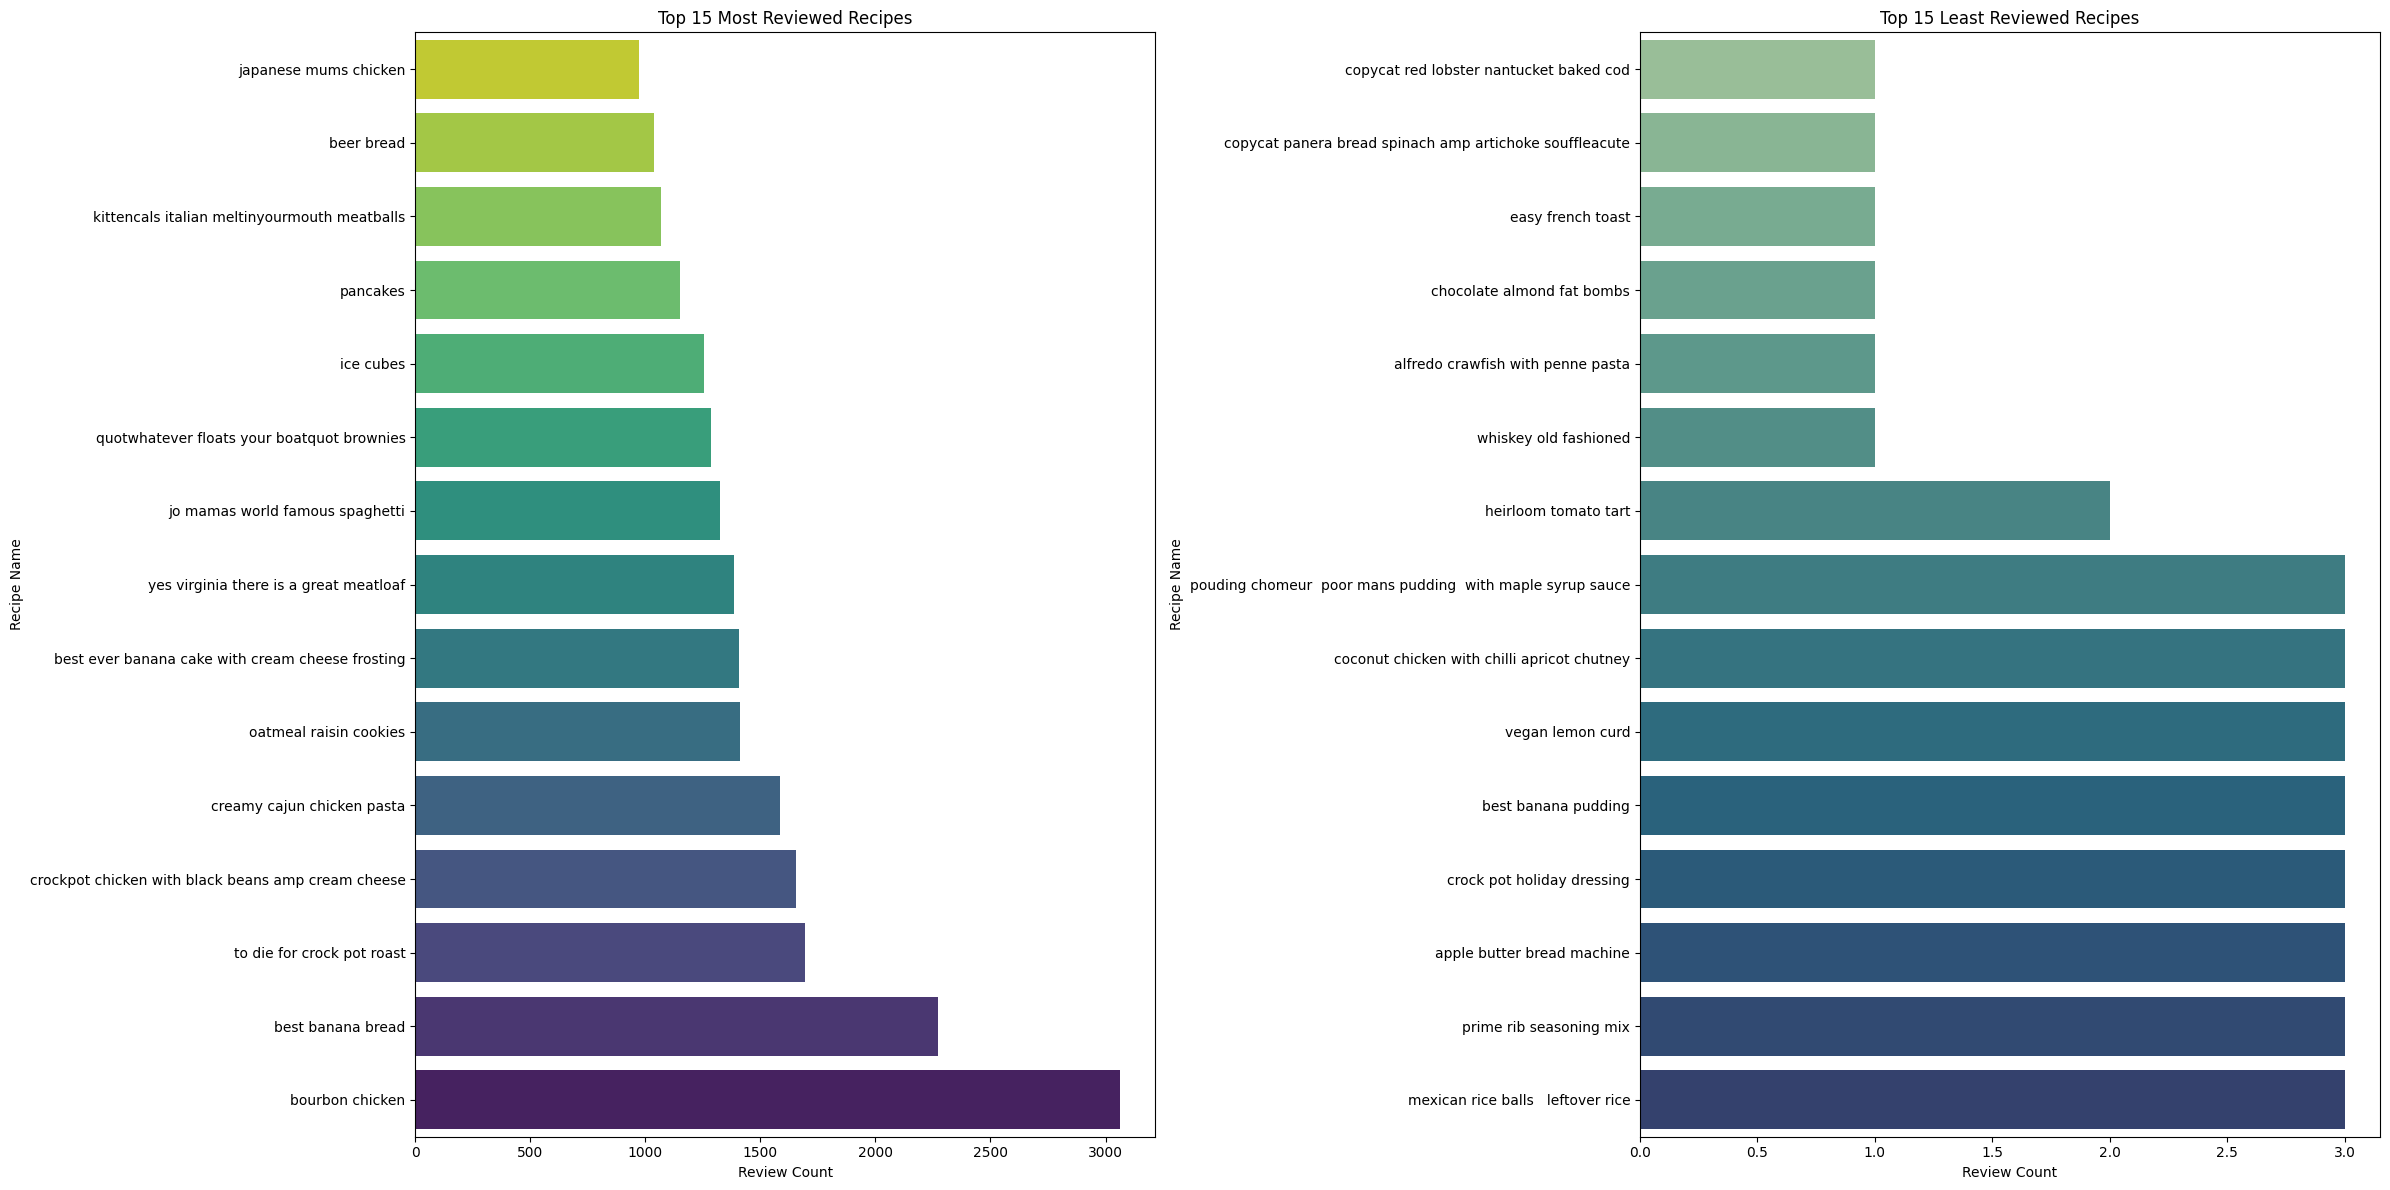

In [40]:
# Set N for top/bottom
top_n = 15

# Sort for most and least reviewed
recipe_reviews_summary = merged_df.groupby(['RecipeId', 'Name'])['ReviewCount'].first().reset_index()
most_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=False).head(top_n)
least_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=True).head(top_n)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharex=False)

# Plot: Most Reviewed
sns.barplot(ax=axes[0], x='ReviewCount', y='Name', data=most_reviewed_recipes, palette='viridis')
axes[0].set_title(f'Top {top_n} Most Reviewed Recipes')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Recipe Name')
axes[0].invert_yaxis()  # Most at top

# Plot: Least Reviewed
sns.barplot(ax=axes[1], x='ReviewCount', y='Name', data=least_reviewed_recipes, palette='crest')
axes[1].set_title(f'Top {top_n} Least Reviewed Recipes')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Recipe Name')
#axes[1].invert_yaxis()  # Least at top

plt.tight_layout()
plt.show()


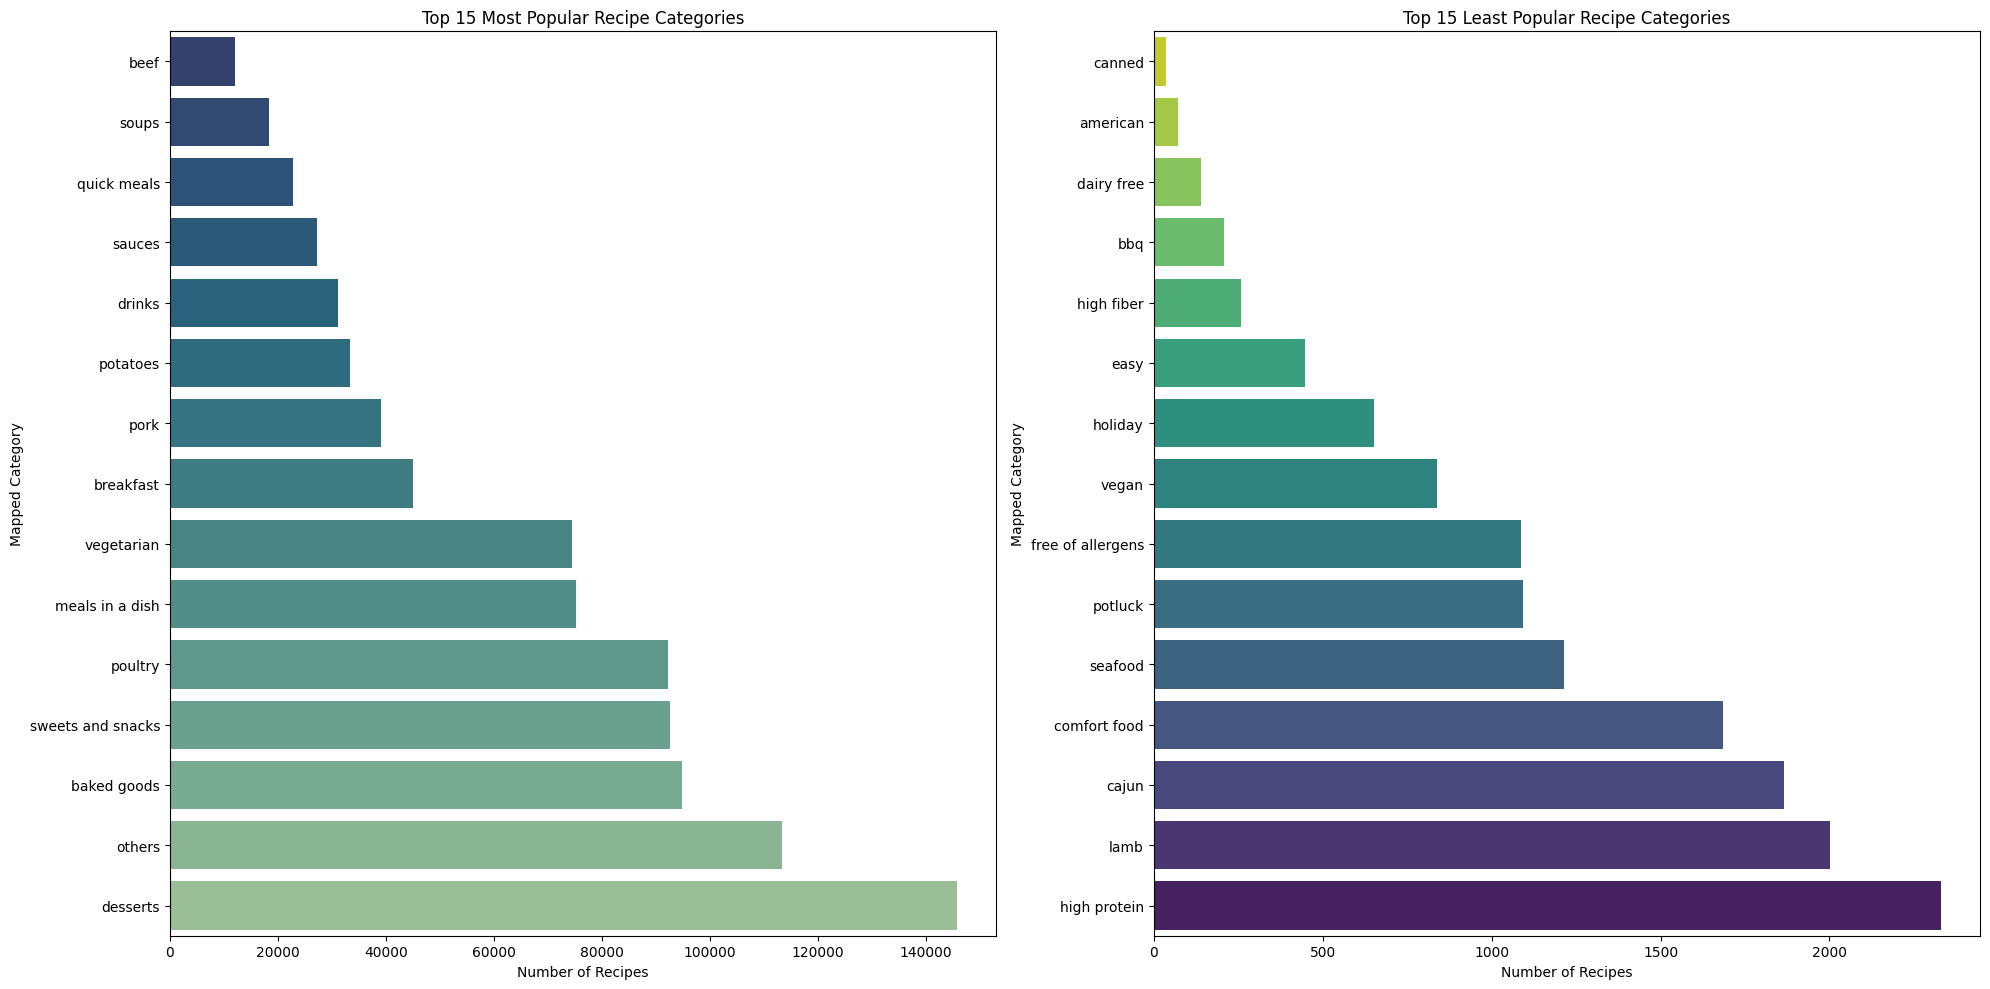

In [41]:
# Set the top and bottom N
top_n_categories = 15
bottom_n_categories = 15

# Prepare data
category_counts = merged_df['MappedCategory'].value_counts().reset_index()
category_counts.columns = ['MappedCategory', 'RecipeCount']
category_counts = category_counts.sort_values(by='RecipeCount', ascending=False)

# Get top and bottom categories
top_categories_plot = category_counts.head(top_n_categories)
bottom_categories_plot = category_counts.tail(bottom_n_categories)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=False)

# Plot: Most Popular Categories
sns.barplot(ax=axes[0], x='RecipeCount', y='MappedCategory', data=top_categories_plot, palette='crest')
axes[0].set_title(f'Top {top_n_categories} Most Popular Recipe Categories')
axes[0].set_xlabel('Number of Recipes')
axes[0].set_ylabel('Mapped Category')
axes[0].invert_yaxis()

# Plot: Least Popular Categories
sns.barplot(ax=axes[1], x='RecipeCount', y='MappedCategory', data=bottom_categories_plot, palette='viridis')
axes[1].set_title(f'Top {bottom_n_categories} Least Popular Recipe Categories')
axes[1].set_xlabel('Number of Recipes')
axes[1].set_ylabel('Mapped Category')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


##Visualizations for Nutrition Distribution

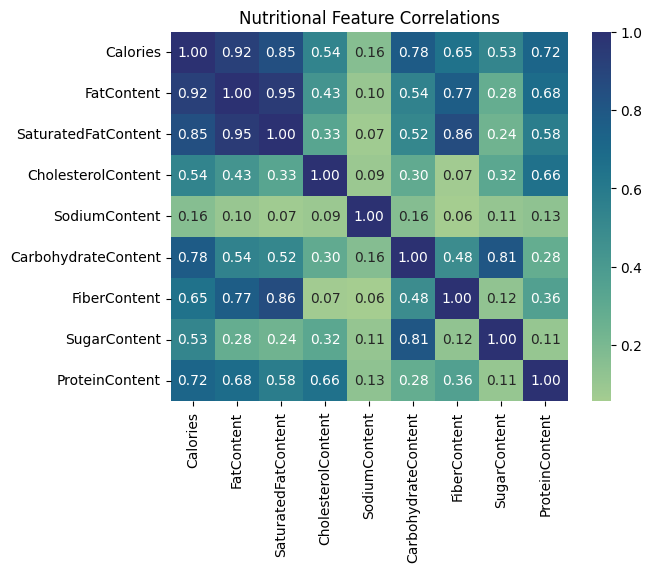

In [42]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                  'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']
corr = merged_df[nutrition_cols].corr()

sns.heatmap(corr, annot=True,cmap='crest', fmt=".2f")
plt.title('Nutritional Feature Correlations')
plt.show()

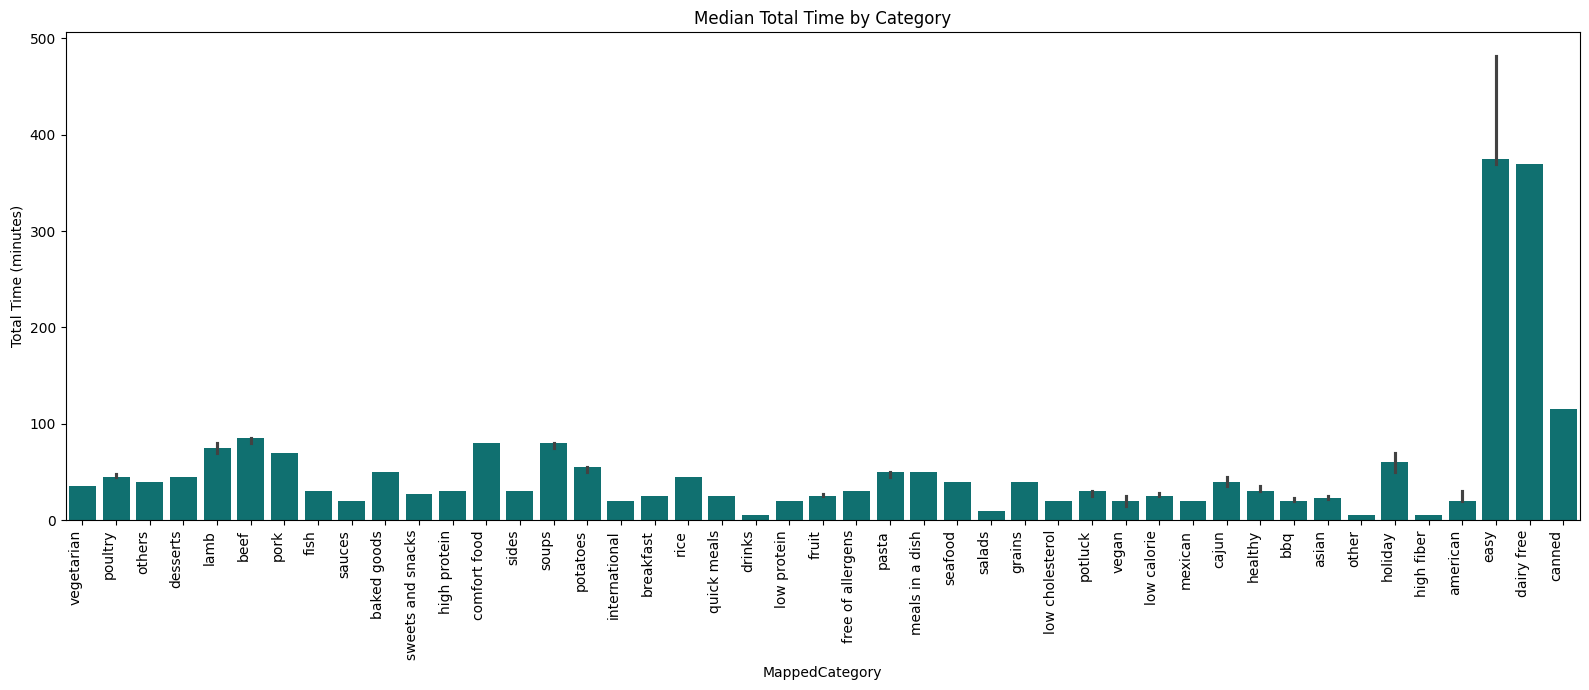

In [43]:
plt.figure(figsize=(16, 7))
sns.barplot(data=merged_df, x='MappedCategory', y='TotalTimeMinutes', estimator='median', color='teal')
plt.title('Median Total Time by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

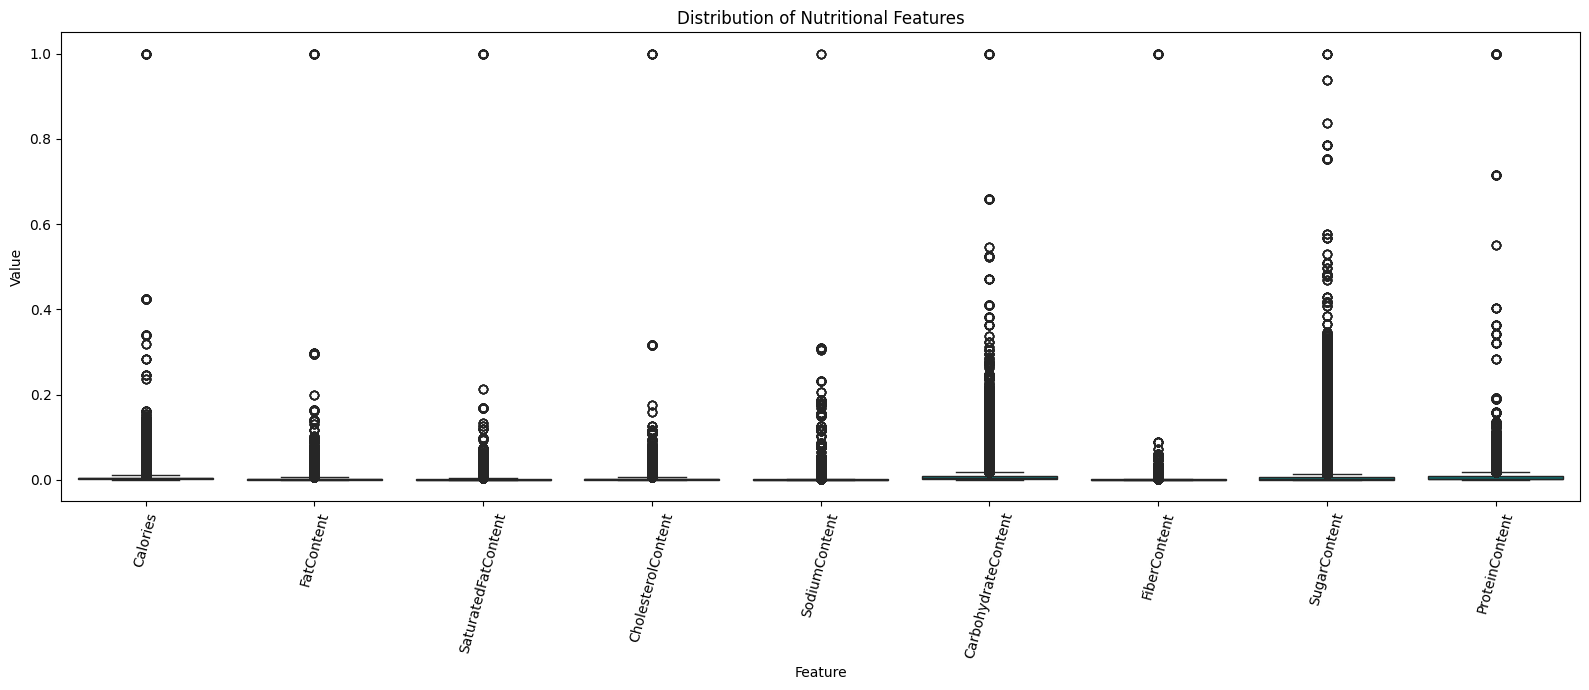

In [44]:
# Melt the DataFrame to long format
numeric_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']

melted = merged_df[numeric_cols].melt(var_name='Feature', value_name='Value')

# Boxplot for all features
plt.figure(figsize=(16, 7))
sns.boxplot(data=melted, x='Feature', y='Value', color='teal')
plt.title('Distribution of Nutritional Features')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()